In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from web
from pandas_datareader import data, wb

# For time stamps
from datetime import datetime

In [3]:
#Companies for stock analysis
tech_list =['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [4]:
#To get current date and time 
end = datetime.now()
end

datetime.datetime(2019, 12, 2, 10, 35, 32, 430099)

In [52]:
#To find start date(here - last 1 year) for analysis
start = datetime(end.year - 1,end.month,end.day)
start

datetime.datetime(2018, 12, 2, 0, 0)

In [6]:
#Taking data from yahoo finance data and setting as a dataframe
#Using globals() for setting the DataFrame names
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,201.152829,197.488207,199.229800,199.438287,2.937108e+07,198.009861
std,29.629024,29.712409,29.660019,29.764834,1.232168e+07,30.369897
min,145.720001,142.000000,143.979996,142.190002,6.682388e+06,140.085220
25%,177.834999,174.245003,175.545006,175.300003,2.103770e+07,173.779335
50%,200.990005,198.169998,199.460007,199.500000,2.622090e+07,197.983475
75%,214.875000,211.185005,213.525002,212.839996,3.427400e+07,211.913780
max,268.250000,265.899994,267.899994,267.839996,9.574460e+07,267.839996


In [9]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-28,181.289993,174.929993,176.729996,180.940002,46062500.0,178.261627
2018-11-29,182.800003,177.699997,182.660004,179.550003,41770000.0,176.892197
2018-11-30,180.330002,177.029999,180.289993,178.580002,39531500.0,175.936554
2018-12-03,184.940002,181.210007,184.460007,184.820007,40802500.0,182.084183
2018-12-04,182.389999,176.270004,180.949997,176.690002,41344300.0,174.074539


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-11-28 to 2019-11-27
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


# 1.) What was the change in price of the stock over time?

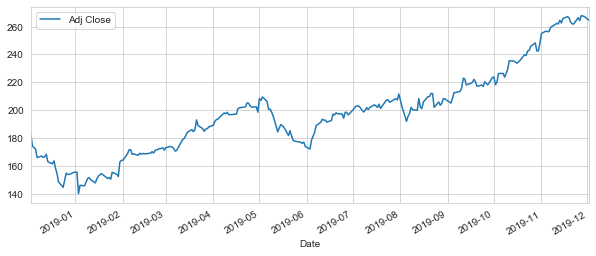

In [8]:
#closing price of Apple in last 1 year
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

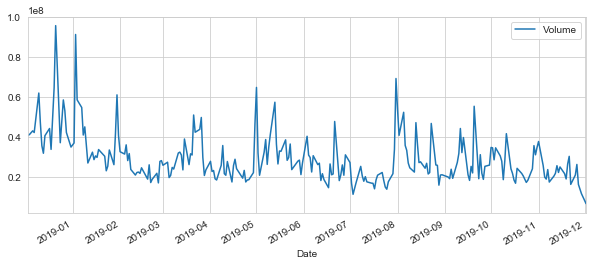

In [9]:
# Volume of Apple stocks traded within a year
AAPL['Volume'].plot(legend = True, figsize = (10,4))

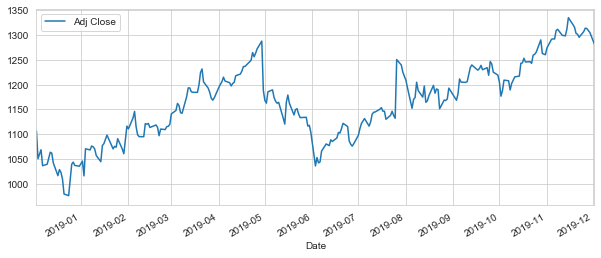

In [10]:
#closing price of Google
GOOG['Adj Close'].plot(legend = True, figsize = (10,4))

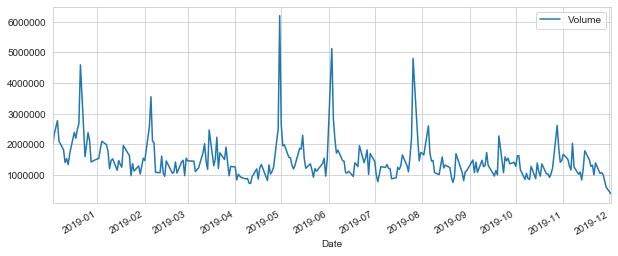

In [11]:
# Volume of Google stocks traded within a year
GOOG['Volume'].plot(legend = True, figsize = (10,4))

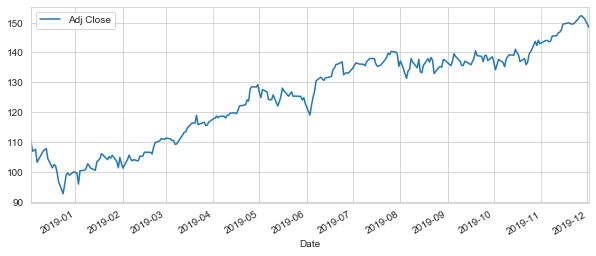

In [12]:
#closing price of Microsoft
MSFT['Adj Close'].plot(legend = True, figsize = (10,4))

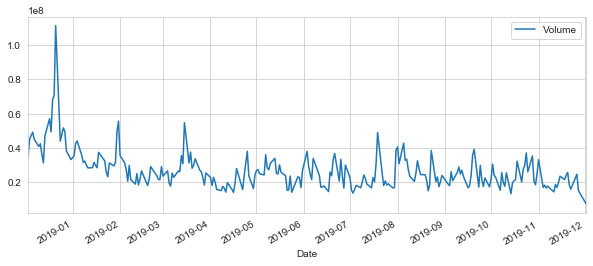

In [13]:
# Volume of Microsoft stocks traded within a year
MSFT['Volume'].plot(legend = True, figsize = (10,4))

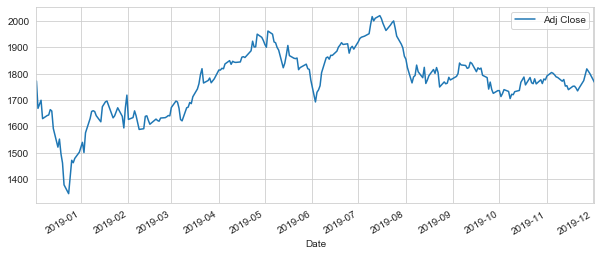

In [14]:
#To see historical view of the closing price of Amazon
AMZN['Adj Close'].plot(legend = True, figsize = (10,4))

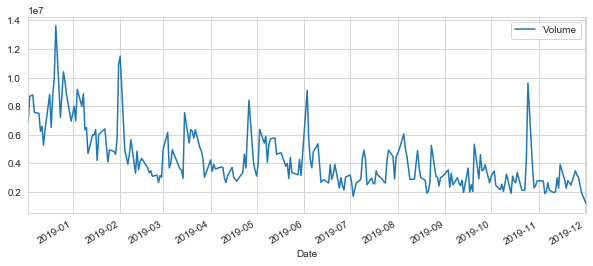

In [15]:
# Volume of Amazon stocks traded within a year
AMZN['Volume'].plot(legend = True, figsize = (10,4))

In [40]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-23,176.600006,172.100006,174.940002,172.289993,23624000.0,169.739655
2018-11-26,174.949997,170.259995,174.240005,174.619995,44998500.0,172.035172
2018-11-27,174.770004,170.880005,171.509995,174.240005,41387400.0,171.660797
2018-11-28,181.289993,174.929993,176.729996,180.940002,46062500.0,178.261627
2018-11-29,182.800003,177.699997,182.660004,179.550003,41770000.0,176.892197


In [15]:
AAPL['High'].max()

268.0

In [16]:
AAPL['Low'].max()

265.3900146484375

In [17]:
AAPL['Low'].min()

142.0

# 2.) What was the daily return of the stock on average?

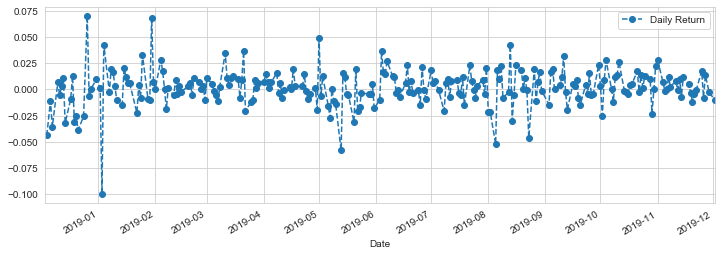

In [16]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

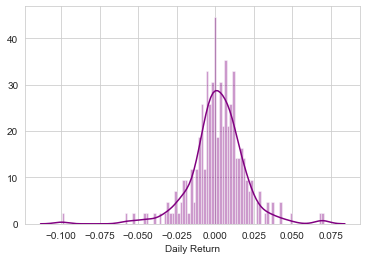

In [17]:
# dropna() used here to drop the NaN values
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

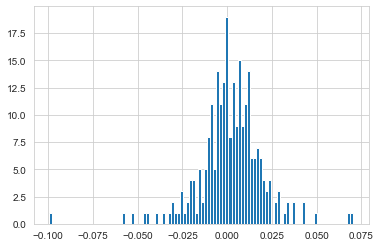

In [54]:
AAPL['Daily Return'].hist(bins = 100)

# 3.) What was the moving average of the various stocks?

In [18]:
#Moving Average of Apple stock
ma_days = [10,20,50]
for ma in ma_days:
    column_name = "%s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [72]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,10 days,20 days,50 days
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,243.000000,233.000000,203.000000
mean,200.387024,196.702024,198.462261,198.675953,2.968718e+07,197.221529,196.368602,195.597421,194.889058
std,29.029203,29.111273,29.045371,29.177472,1.224544e+07,29.775750,28.418790,26.551655,20.568703
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220,148.423929,150.503188,158.624555
25%,177.877499,174.382504,175.572506,175.415001,2.113860e+07,173.832317,173.894009,178.248456,184.590755
50%,200.675003,198.019997,199.000000,199.239998,2.644210e+07,197.412338,198.010825,197.581352,192.818701
75%,214.082500,210.427505,212.247501,211.927502,3.479432e+07,210.197338,207.164536,206.641606,207.029424
max,268.000000,265.390015,267.899994,267.839996,9.574460e+07,267.839996,264.727005,261.404964,242.580217


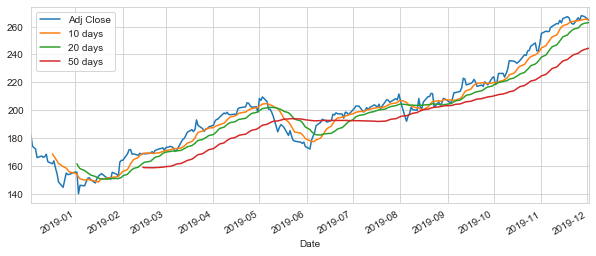

In [19]:
AAPL[['Adj Close','10 days','20 days','50 days']].plot(legend=True, figsize = (10,4))

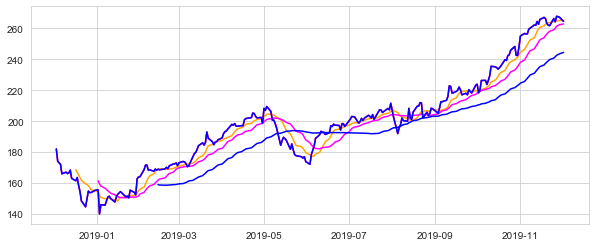

In [20]:
plt.figure(figsize=[10,4])
plt.legend
#plt.plot(AAPL[['Adj Close','10 days','20 days','50 days']], data = AAPL)
plt.plot(AAPL[['Adj Close','10 days',]],color='orange',  data = AAPL)
plt.plot(AAPL[['Adj Close','20 days',]], color='magenta', data = AAPL)
plt.plot(AAPL[['Adj Close','50 days',]], color='blue', data = AAPL)

In [21]:
#Moving Average of Google stock
ma_days = [10,20,50]
for ma in ma_days:
    column_name = "%s days" %(str(ma))
    GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma,center=False).mean()

In [79]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close,10 days,20 days,50 days
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,195.000000,186.000000,176.000000,146.000000
mean,1172.112404,1152.010410,1161.448234,1162.665953,1.488621e+06,1161.186698,1161.514930,1161.808507,1161.346575
std,74.736625,78.033313,75.843491,76.809447,6.632734e+05,46.464084,43.248137,39.431817,25.306951
min,1003.539978,970.109985,973.900024,976.219971,7.102000e+05,1063.772516,1074.585997,1086.093578,1123.133693
25%,1111.897461,1095.552490,1105.239990,1103.622498,1.088250e+06,1118.829650,1121.276497,1124.855351,1137.842503
50%,1176.304993,1156.395020,1164.049988,1166.765015,1.335300e+06,1170.010446,1169.520499,1168.365727,1162.791540
75%,1226.532471,1206.230988,1215.197479,1216.795044,1.627175e+06,1201.395264,1199.532254,1196.880338,1184.107558
max,1335.529053,1317.500000,1332.219971,1334.869995,6.207000e+06,1245.082445,1234.888190,1227.711546,1209.052589


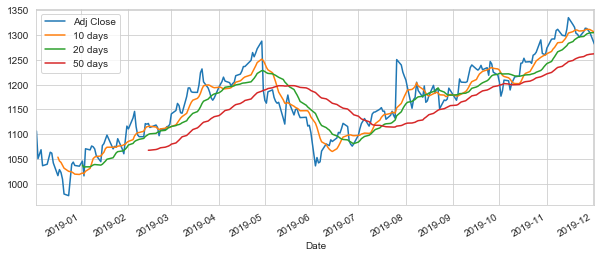

In [22]:
GOOG[['Adj Close','10 days', '20 days', '50 days']].plot(subplots = False, legend = True , figsize = (10,4))

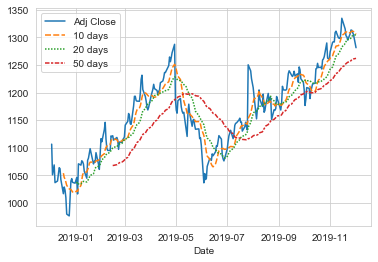

In [23]:
sns.lineplot(data = GOOG[['Adj Close','10 days', '20 days', '50 days']])

In [24]:
#Moving Average of Amazon stock
ma_days = [10,20,50]
for ma in ma_days:
    column_name = "%s days" %(str(ma))
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=False).mean()

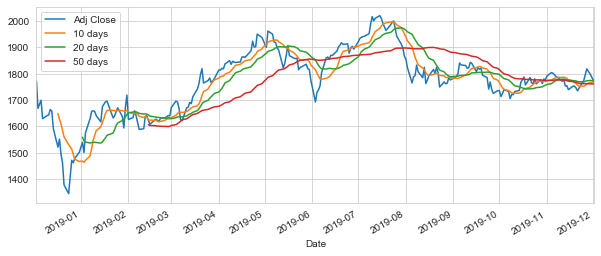

In [25]:
AMZN[['Adj Close', '10 days', '20 days', '50 days']].plot(subplots = False, figsize = (10,4))

In [26]:
#Moving Average of Amazon stock
ma_days = [10,20,50]
for ma in ma_days:
    column_name = "%s days" %(str(ma))
    MSFT[column_name] = MSFT['Adj Close'].rolling(window=ma,center=False).mean()

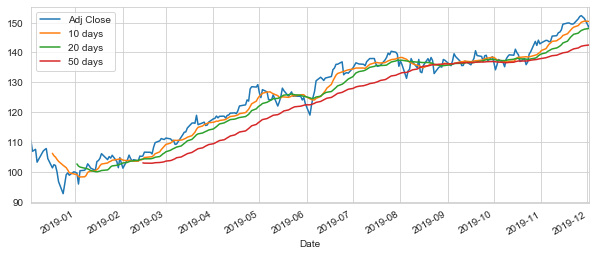

In [27]:
MSFT[['Adj Close', '10 days', '20 days', '50 days']].plot(subplots = False, figsize = (10,4))

# 4.) What was the correlation between different stocks closing prices?

In [55]:
# Grabbing all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [56]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-03,182.084183,1106.430054,110.456779,1772.359985
2018-12-04,174.074539,1050.819946,106.938789,1668.400024
2018-12-06,172.133682,1068.729980,107.599037,1699.189941
2018-12-07,165.995926,1036.579956,103.292702,1629.130005
2018-12-10,167.089478,1039.550049,106.022339,1641.030029


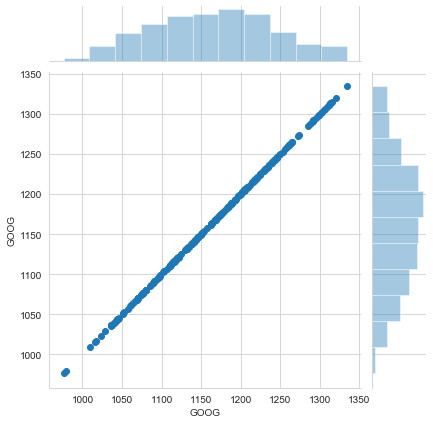

In [30]:
sns.jointplot('GOOG','GOOG',closing_df,kind='scatter')

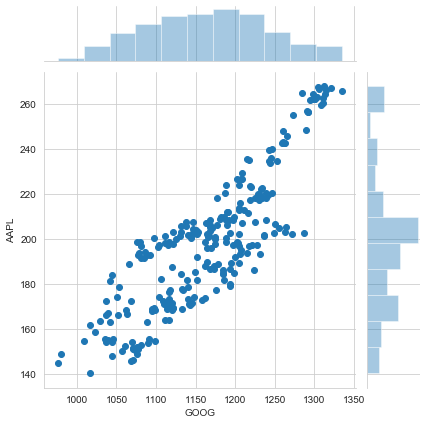

In [31]:
sns.jointplot('GOOG','AAPL',closing_df,kind='scatter')

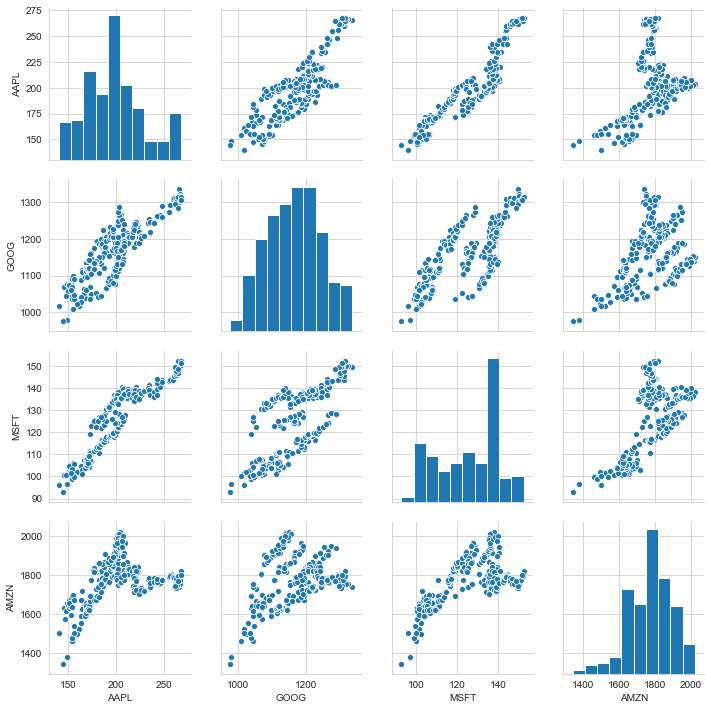

In [32]:
sns.pairplot(closing_df,kind='scatter')

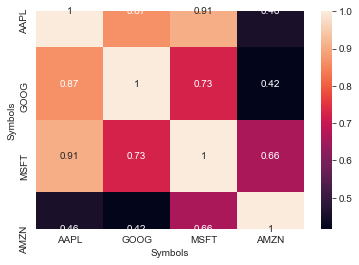

In [33]:
# Let's go ahead and use seaborn for a quick correlation plot for the closing
sns.heatmap(closing_df.dropna().corr(), annot=True);

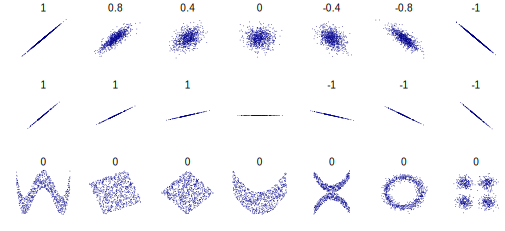

In [34]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

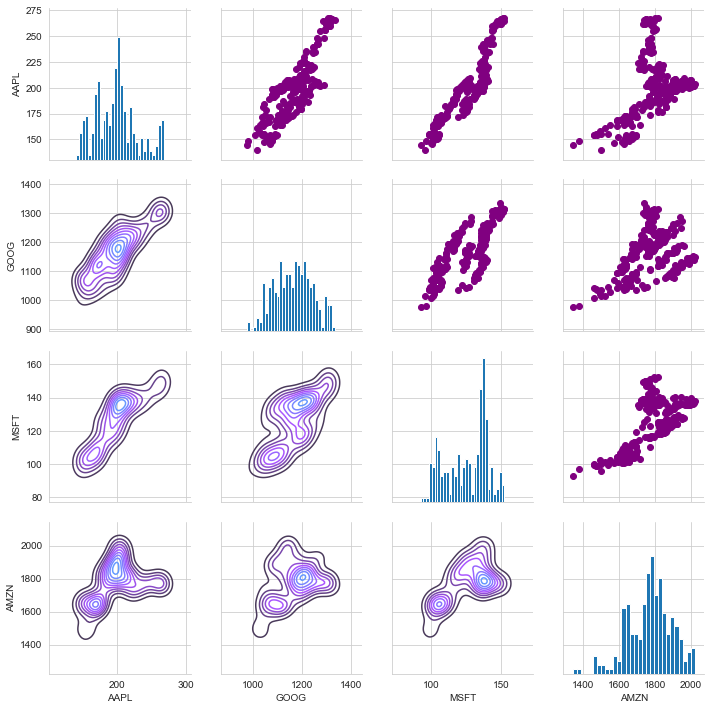

In [35]:
#Another way to visualize data by addiing different plots with different colors
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

# 4.) What was the correlation between different stocks daily returns?

In [36]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

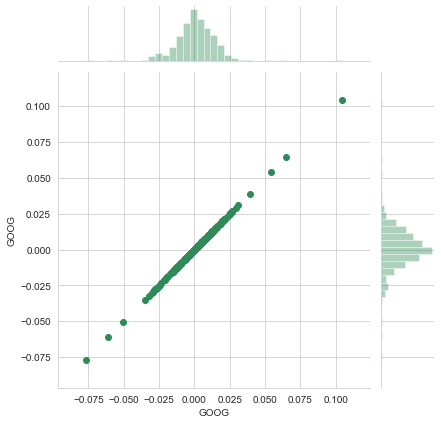

In [37]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

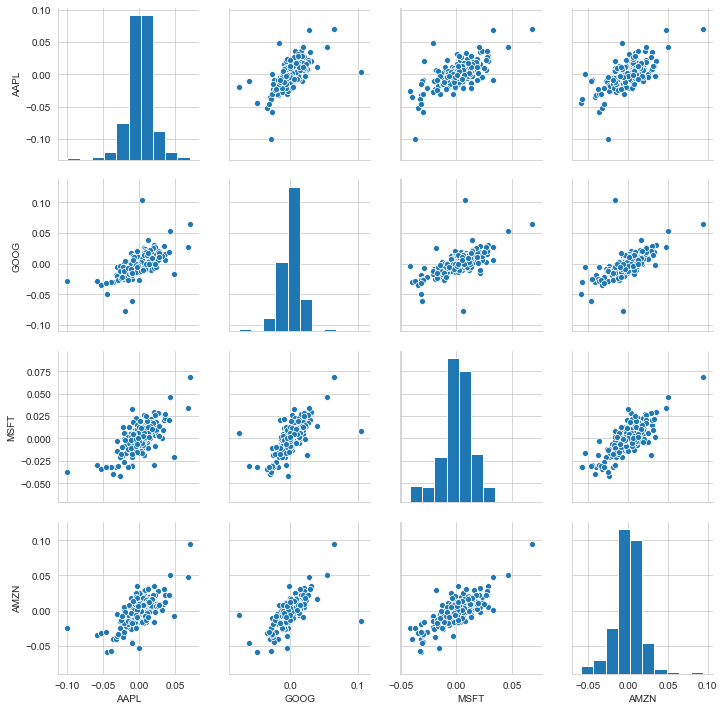

In [38]:
sns.pairplot(tech_rets.dropna())

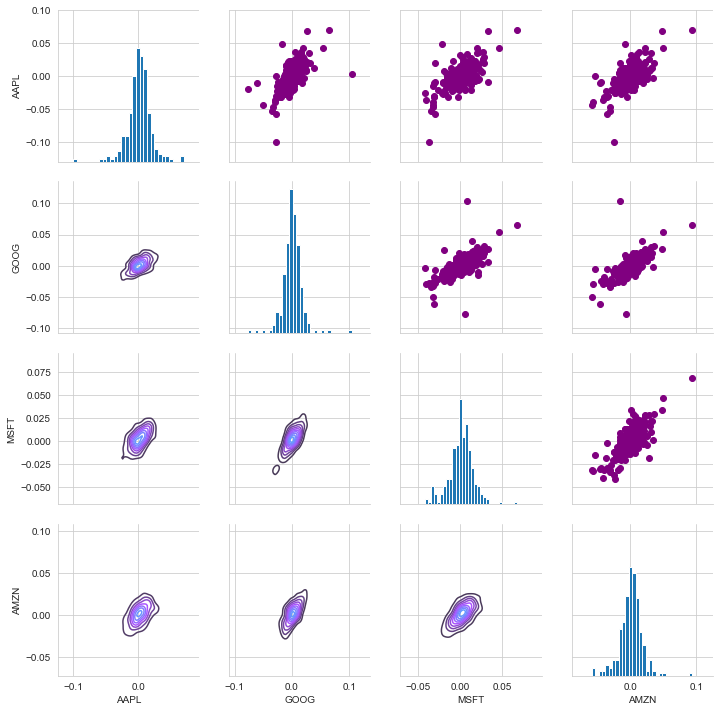

In [57]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

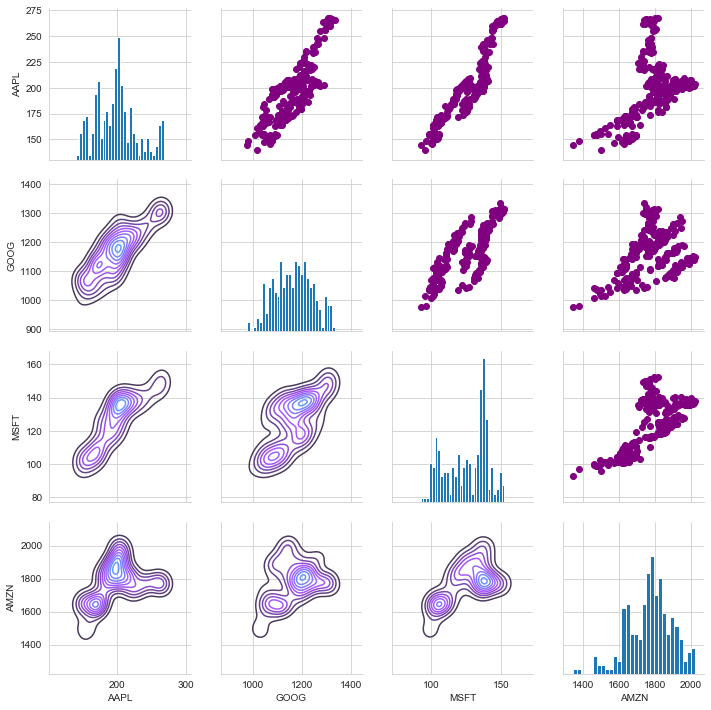

In [58]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

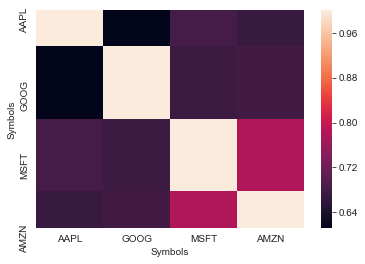

In [40]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.dropna().corr());

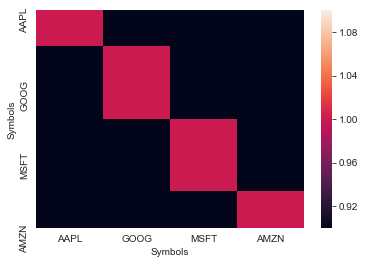

In [195]:
sns.heatmap(tech_rets.dropna().corr(), vmin=1);

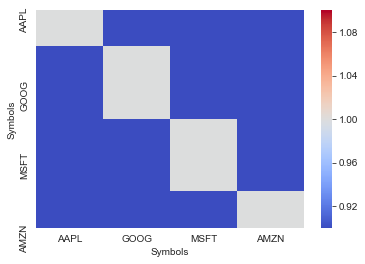

In [191]:
sns.heatmap(tech_rets.corr(), vmin=1 , cmap='coolwarm');

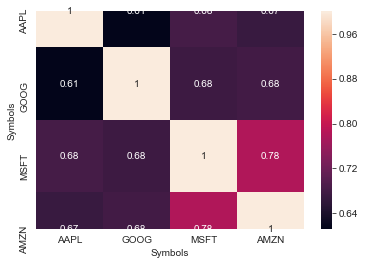

In [41]:
sns.heatmap(tech_rets.corr(), annot=True);

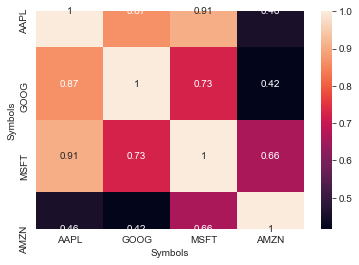

In [59]:
sns.heatmap(closing_df.corr(), annot=True);

# 5.) How much value do we put at risk by investing in a particular stock?

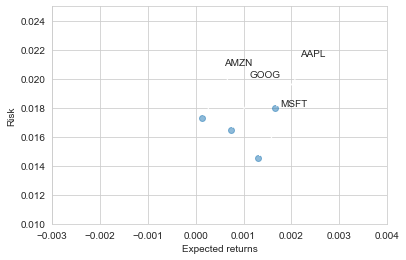

In [66]:
#Average return vs std deviation
rets = tech_rets.dropna()
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))    

Here we could see Apple has highest returns with highest risk while Microsoft gives 
pretty good return withnlowest risk

In [67]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.025586292845883995

The 0.05 empirical quantile of daily returns for Apple is .0255.This means 95% chance is AAPL stocks are at risk 
by 2.5% so for 1 million investment , (0.05)5% variance is -> .0255 * $1000000 = $25500

In [68]:
rets['GOOG'].quantile(0.05)

-0.024933593304081396

The 0.05 empirical quantile of daily returns for Google is .0249.This means 95% chance is Google stocks are at risk 
by 2.49% so for 1 million investment , (0.05)5% variance is -> .0249 * $1000000 = $24900

In [70]:
rets['MSFT'].quantile(0.05)

-0.029369418051888932

In [71]:
rets['AMZN'].quantile(0.05)

-0.030252642325132792

# 6.) How can we attempt to predict future stock behavior?

In [73]:
# Set up our time horizon
days = 365

# delta
dt = 1/days

# mu (drift)-average from the expected return data we got for GOOG
mu = rets.mean()['GOOG']

# volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [75]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    
    price = np.zeros(days)
    price[0] = start_price
   
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
       
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        
        # Price is previous price + change in price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [76]:
# Get start price from GOOG.head()
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,10 days,20 days,50 days
Date,,,,,,,,,
2018-12-03,1124.650024,1103.665039,1123.140015,1106.430054,1991200,1106.430054,NaN,NaN,NaN
2018-12-04,1104.420044,1049.979980,1103.119995,1050.819946,2345200,1050.819946,NaN,NaN,NaN
2018-12-06,1071.199951,1030.770020,1034.260010,1068.729980,2769200,1068.729980,NaN,NaN,NaN
2018-12-07,1075.260010,1028.500000,1060.010010,1036.579956,2101200,1036.579956,NaN,NaN,NaN
2018-12-10,1048.449951,1023.289978,1035.050049,1039.550049,1807700,1039.550049,NaN,NaN,NaN


In [77]:
start_price = 1124.65

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

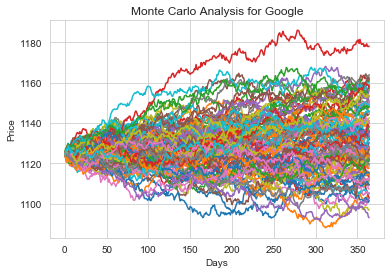

In [78]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [80]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

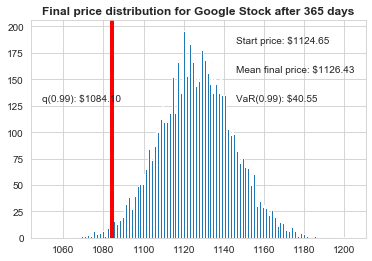

In [82]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% 
#of the values should fall between here
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Variance(99% of time) is less 40.55 dollars -> which is a value at risk over year on $1124.65, isn't much hence seems Google stock is very stable.

In [83]:
#Check the price change over year for Microsoft

days = 365
dt = 1/days
mu = rets.mean()['MSFT']
sigma = rets.std()['MSFT']

In [84]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,10 days,20 days,50 days
Date,,,,,,,,,
2018-12-03,113.419998,110.730003,113.000000,112.089996,34732800.0,110.456779,NaN,NaN,NaN
2018-12-04,112.639999,108.209999,111.940002,108.519997,45197000.0,106.938789,NaN,NaN,NaN
2018-12-06,109.239998,105.000000,105.820000,109.190002,49107400.0,107.599037,NaN,NaN,NaN
2018-12-07,109.449997,104.300003,108.379997,104.820000,45044900.0,103.292702,NaN,NaN,NaN
2018-12-10,107.980003,103.889999,104.800003,107.589996,40801500.0,106.022339,NaN,NaN,NaN


In [85]:
start_price = 113.419

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

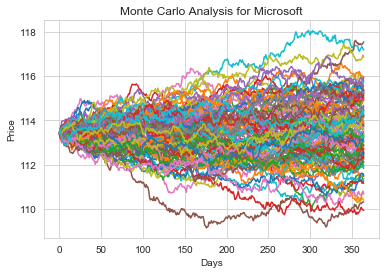

In [86]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

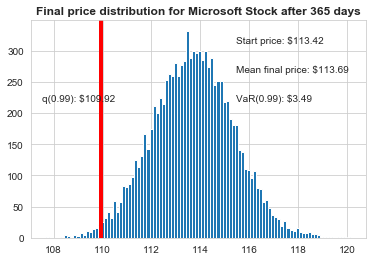

In [94]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    
    
q = np.percentile(simulations,1)
plt.hist(simulations, bins = 100)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6,"VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');

Variance(99% of time) is less 3.49 dollars -> which is a value at risk over year on $113.42, isn't much hence seems Microsoft stock is very stable.